In [1]:
import numpy as np
import pandas as pd
import torch
from unityagents import UnityEnvironment
from agent import Agent
from ddpg import ddpg

import matplotlib.pyplot as plt

In [3]:
# Load Environment
env = UnityEnvironment(file_name='Reacher_Windows_x86_64/Reacher_Windows_x86_64/Reacher.exe', no_graphics=True)

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33


## Training

In [6]:
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Device', DEVICE)
print('*'*50)

agent = Agent(env, gamma=0.99, tau=0.001,
              batch_size=128, buffer_size=int(1e6),
              lr_actor=0.001, lr_critic=0.0001,
              local_update_freq=1, target_update_freq=10, device=DEVICE)

scores = ddpg(env, agent, n_episodes=1000, print_every=100)

Device cuda:0
**************************************************
Episode  100	Average Score: 0.86          
Episode  200	Average Score: 4.00          
Episode  300	Average Score: 14.60          
Episode  400	Average Score: 30.64          
Episode  500	Average Score: 34.82          
Episode  600	Average Score: 35.02          
Episode  700	Average Score: 34.31          
Episode  800	Average Score: 33.62          
Episode  900	Average Score: 33.18          
Episode 1000	Average Score: 33.13          


## Scores

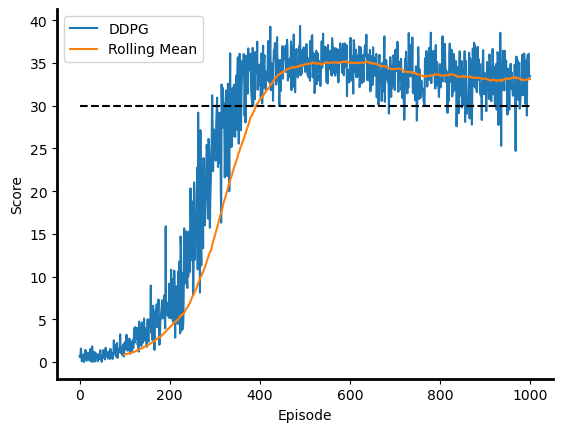

In [9]:
plt.plot(scores, label='DDPG')
plt.plot(pd.Series(scores).rolling(100).mean(), label='Rolling Mean')
plt.legend()
plt.xlabel('Episode')
plt.ylabel('Score')

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

plt.hlines(y=30, xmin=0, xmax=1000, linestyles='--', color='k')

In [11]:
torch.save(agent.actor_local.state_dict(), 'actor_checkpoint.pth')
torch.save(agent.critic_local.state_dict(), 'critic_checkpoint.pth')

## Visualization

In [1]:
from visualize_agent import visualize

visualize(actor_filepath='saved_models/actor_checkpoint.pth',
          critic_filepath='saved_models/critic_checkpoint.pth',
          env_exe_path='Reacher_Windows_x86_64/Reacher_Windows_x86_64/Reacher.exe',
          n_steps=1000,
          sleep_between_frames=1e-8)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Device cuda:0
**************************************************
Actor successfully loaded from saved_models/actor_checkpoint.pth
Critic successfully loaded from saved_models/critic_checkpoint.pth
**************************************************
Total Reward: 37.24
